<a href="https://colab.research.google.com/github/purvikabajaj/Convolutional-Neural-Networks/blob/master/CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
cifar = tf.keras.datasets.cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar.load_data()

170500096/170498071 [==============================] - 2s 0us/step


[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


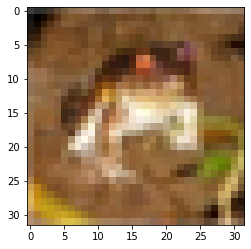

In [ ]:
print(x_train[0])
plt.imshow(x_train[0])

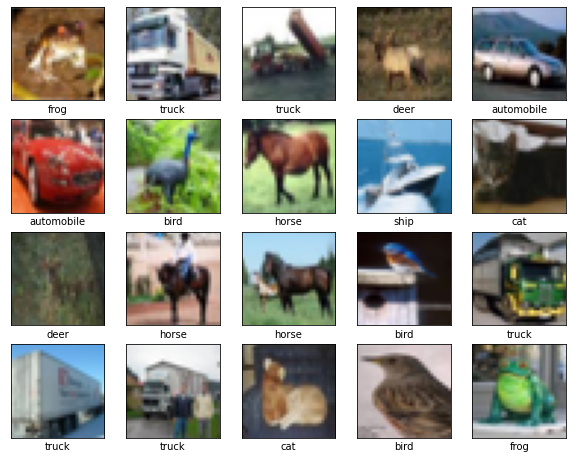

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i][0]])

In [ ]:
print('TRAINING DATA: ', x_train.shape, y_train.shape)
print('TESTING DATA: ', x_test.shape, y_test.shape)

TRAINING DATA:  (50000, 32, 32, 3) (50000, 1)
TESTING DATA:  (10000, 32, 32, 3) (10000, 1)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 32,32,3)
x_test = x_test.reshape(x_test.shape[0], 32,32,3)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 128)       36992     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 128)         147584    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 2, 2, 128)        

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4907 - accuracy: 0.4563
Epoch 2/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1248 - accuracy: 0.5983
Epoch 3/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9844 - accuracy: 0.6525
Epoch 4/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8887 - accuracy: 0.6877
Epoch 5/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8178 - accuracy: 0.7110
Epoch 6/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7627 - accuracy: 0.7316
Epoch 7/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7253 - accuracy: 0.7456
Epoch 8/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6792 - accuracy: 0.7605
Epoch 9/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6496 - accuracy: 0.7704
Epoch 10/25
1563/1563 [==============================] - 12s 8ms/step - l

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7564 - accuracy: 0.7581


[0.756365180015564, 0.7580999732017517]

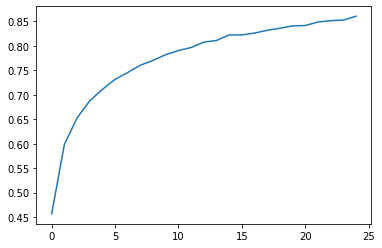

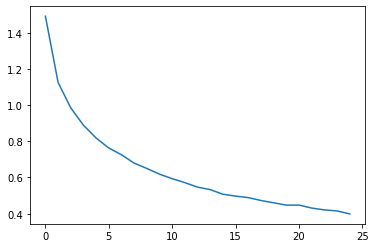

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Accuracy')
plt.figure()
plt.plot(epochs, loss, label='Loss')